In [1]:
from sklearn.model_selection import validation_curve #validation_curve模块
from sklearn.datasets import load_digits 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#digits数据集
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
param_range = np.logspace(-6,-2.3,5)
print(param_range)

[  1.00000000e-06   8.41395142e-06   7.07945784e-05   5.95662144e-04
   5.01187234e-03]


In [4]:
#使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')


In [5]:
#平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

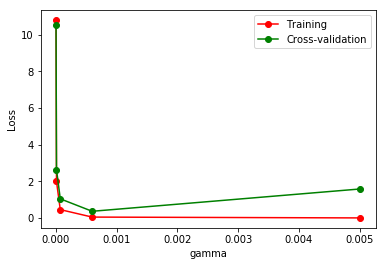

In [6]:
#可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()